In [32]:
%matplotlib inline
import shanwilpy.software.gint as gint

import pyodbc
import numpy as np
from shanwilpy.figure import swfig
import matplotlib.pyplot as plt
import datetime as dt
from scipy import interpolate
import pandas as pd
from collections import OrderedDict
import os
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import pandas as pd
from pandas import ExcelWriter
import pylab as plb
import re
import itertools
import gc

In [164]:
notes = ['The soldier pile wall is assumed to be flexible, such that the wall will be capable of 1 to 2 inches of displacement, '
         'or more, during the design seismic event.',
         'All earth pressures are in units of pounds per square foot (psf).',
         'All earth pressures are nominal (i.e., unfactored). Passive earth pressures should be reduced by a '
         'resistance factor based on the limit state. Per the WSDOT GDM, the WSDOT BDM, and AASHTO, we recommend '
         'resistance factors of 0.75 for the Strength Limit State and 1.0 for the Service and Extreme Event Limit States.',
         'Above the bottom of excavation, active pressures are assumed to act over the pile spacing. Below the bottom '
         'of excavation, active pressures are assumed to act over the pile width/diameter.',
         'Passive resistance for the upper 2 feet should be ignored. Passive resistance should be applied over '
         '3 times the width/diameter of the piles of the spacing of the piles, whichever is smaller.',
         'Design permanent timber lagging for 60% of lateral earth pressure.',
         'Design facing to account for soil arching in accordance with AASHTO LRFD BDS (2020) Section 11.8.5.2.',
         'Surcharge loading should be added to the active pressures, where appropriate. See Figure 2.',
         'Earth pressures assume drained conditions behind the wall to the bottom of excavation, such that hydrostatic '
         'groundwater pressures are assumed balanced behind and in front of the wall beneath the bottom of excavation.',
         'Wall embedment, D, should consider kickout resistance. Embedment should be determined by satisfying horizontal '
         'static equilibrium about the bottom of the pile. Minimum recommended embedment is 1.5 to 2 times the total '
         'height of the exposed wall, H, for cantilever walls.',
         'Seismic earth pressures include the static earth pressure component.',
         'We recommend the following nominal vertical soldier pile resistance below bottom of wall:\n'
         '    -Side Resistance of Peat = 0.25ksf\n'
         '    -Side Resistance of Recessional and Advance Outwash = 2ksf\n'
         '    -Base Resistance of Recessional and Advance Outwash = 50ksf (after loose/disturbed soil at bottom of hole is removed)\n'
         '  Resistance factors of 0.55 and 0.50 should be applied to side and base resistance, respectively.',
'The earth pressures assume that lagging will be placed down to an elevation of 327ft and backfilling to a final elevation of 329ft in '
         'front of the wall will be completed before backfill placement behind the wall. '
                ]

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


27975

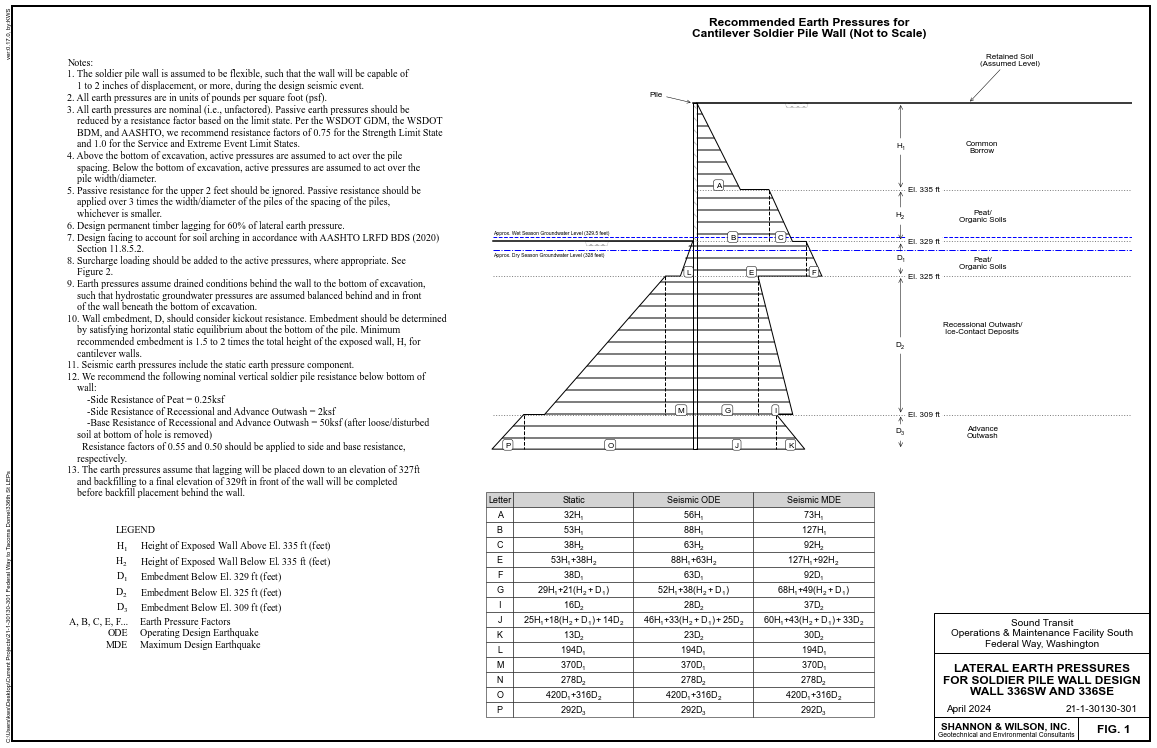

In [181]:
fignum = 1
fig = swfig(paper='tabloid',
            orient='landscape',
            project=['Sound Transit',
                     'Operations & Maintenance Facility South',
                     'Federal Way, Washington'],
            projectno='21-1-30130-301',
            fignum=fignum,
            figname=['Lateral Earth Pressures',
                     'For Soldier Pile Wall Design',
                     'Wall 336Sw and 336SE'],
            #date='May 2023',
            uppercase=True,
            )
gs = plt.GridSpec(1,5)
ax = fig.add_subplot(gs[:,2:])
gs.update(left=0.05, right=0.95, bottom=0.35)
#######################################################################################################################
#Plot pile and ground surface
tow = 345
bow = 329
bbow = bow - 1.5*(tow-bow)
ax.plot([-3,0,0,-3,-3],[tow,tow,bbow,bbow,tow],color = 'k',marker = '',ls = '-')
ax.fill_betweenx([tow,bbow],-3,0,hatch = '\\\\',color = 'gray',facecolor = 'White',alpha = 0.5)
ax.fill_betweenx([tow,tow-0.5,tow-0.5,tow],[65,66,81,82],hatch = 'oo',color = 'gray',facecolor = 'White',alpha = 0.5)
ax.fill_betweenx([bow,bow-0.5,bow-0.5,bow],[-65,-66,-81,-82],hatch = 'oo',color = 'gray',facecolor = 'White',alpha = 0.5)

ax.plot([-3,320],[tow,tow],lw = 1.5,color = 'k',ls = '-',marker = '')
ax.plot([-150,-3],[bow,bow],lw = 1.5,color = 'k',ls = '-',marker = '')
ax.set_title('Recommended Earth Pressures for\nCantilever Soldier Pile Wall (Not to Scale)',fontweight = 'bold',
            ha = 'center')
#######################################################################################################################
#Plot groundwater
ax.plot([-150,320],[329.5,329.5],color = 'blue',marker = '',ls = '--')
ax.annotate('Approx. Wet Season Groundwater Level (329.5 feet)',(-150,330),fontsize = 5,ha = 'left',va = 'center')
ax.plot([-150,320],[328,328],color = 'blue',marker = '',ls = 'dashdot')
ax.annotate('Approx. Dry Season Groundwater Level (328 feet)',(-150,327.5),fontsize = 5,ha = 'left',va = 'center')
#######################################################################################################################
#Plot soil layer lines
#Common borrow
ax.plot([0,320],[335,335],color = 'gray',marker = '',ls = 'dotted')
ax.annotate('Common\nBorrow',(210,340),va = 'center',ha = 'center',fontsize = 8)
ax.annotate('', xy=(150, tow), xytext=(150, 335),ha = 'center',va = 'center',
            arrowprops=dict(facecolor='black', arrowstyle='<->'))
ax.annotate('$H_{1}$', xy=(150, tow), xytext=(150, 340),ha = 'center',va = 'center',fontsize = 8,
#             arrowprops=dict(facecolor='black', arrowstyle='<->'),
            bbox=dict(boxstyle='square', facecolor='white', edgecolor='white'))
ax.annotate('El. 335 ft', xy=(155, 335), ha = 'left',va = 'center',fontsize = 8,
#             arrowprops=dict(facecolor='black', arrowstyle='<->'),
            bbox=dict(boxstyle='square', facecolor='white', edgecolor='white'))

ax.plot([0,320],[329,329],color = 'gray',marker = '',ls = 'dotted')
ax.annotate('Peat/\nOrganic Soils',(210,332),va = 'center',ha = 'center',fontsize = 8)
ax.annotate('', xy=(150, 335), xytext=(150, 329),ha = 'center',va = 'center',
            arrowprops=dict(facecolor='black', arrowstyle='<->'))
ax.annotate('$H_{2}$', xy=(150, 340), xytext=(150, 332),ha = 'center',va = 'center',fontsize = 8,
#             arrowprops=dict(facecolor='black', arrowstyle='<->'),
            bbox=dict(boxstyle='square', facecolor='white', edgecolor='white'))
ax.annotate('El. 329 ft', xy=(155, 329), ha = 'left',va = 'center',fontsize = 8,
#             arrowprops=dict(facecolor='black', arrowstyle='<->'),
            bbox=dict(boxstyle='square', facecolor='white', edgecolor='white'))

ax.plot([-150,320],[325,325],color = 'gray',marker = '',ls = 'dotted')
ax.annotate('Peat/\nOrganic Soils',(210,326.5),va = 'center',ha = 'center',fontsize = 8)
ax.annotate('', xy=(150, 329), xytext=(150, 325),ha = 'center',va = 'center',
            arrowprops=dict(facecolor='black', arrowstyle='<->'))
ax.annotate('$D_{1}$', xy=(150, 329), xytext=(150, 327),ha = 'center',va = 'center',fontsize = 8,
#             arrowprops=dict(facecolor='black', arrowstyle='<->'),
            bbox=dict(boxstyle='square', facecolor='white', edgecolor='white'))
ax.annotate('El. 325 ft', xy=(155, 325), ha = 'left',va = 'center',fontsize = 8,
#             arrowprops=dict(facecolor='black', arrowstyle='<->'),
            bbox=dict(boxstyle='square', facecolor='white', edgecolor='white'))

ax.plot([-150,320],[309,309],color = 'gray',marker = '',ls = 'dotted')
ax.annotate('Recessional Outwash/\nIce-Contact Deposits',(210,319),va = 'center',ha = 'center',fontsize = 8)
ax.annotate('', xy=(150, 325), xytext=(150, 309),ha = 'center',va = 'center',
            arrowprops=dict(facecolor='black', arrowstyle='<->'))
ax.annotate('$D_{2}$', xy=(150, 325), xytext=(150, 317),ha = 'center',va = 'center',fontsize = 8,
#             arrowprops=dict(facecolor='black', arrowstyle='<->'),
            bbox=dict(boxstyle='square', facecolor='white', edgecolor='white'))
ax.annotate('El. 309 ft', xy=(155, 309), ha = 'left',va = 'center',fontsize = 8,
#             arrowprops=dict(facecolor='black', arrowstyle='<->'),
            bbox=dict(boxstyle='square', facecolor='white', edgecolor='white'))

# ax.plot([-150,150],[305,305],color = 'gray',marker = '',ls = 'dotted')
ax.annotate('Advance\nOutwash',(210,307),va = 'center',ha = 'center',fontsize = 8)
ax.annotate('', xy=(150, 309), xytext=(150, 305),ha = 'center',va = 'center',
            arrowprops=dict(facecolor='black', arrowstyle='<->'))
ax.annotate('$D_{3}$', xy=(150, 309), xytext=(150, 307),ha = 'center',va = 'center',fontsize = 8,
#             arrowprops=dict(facecolor='black', arrowstyle='<->'),
            bbox=dict(boxstyle='square', facecolor='white', edgecolor='white'))

ax.set_xlim(-155,320)
ax.set_ylim(300,352)
#######################################################################################################################
#Plot active pressure lines
ax.plot([0,32,53,70.4,80.4,92,45,70.6,58.6,79.4,0],[tow,335,335,bow,bow,325,325,309,309,305,305],
       color = 'k',ls = '-',marker = '')
ax.fill_betweenx([tow,335,335,bow,bow,325,325,309,309,305,305],[0,32,53,70.4,80.4,92,45,70.6,58.6,79.4,0],
                facecolor = 'white',hatch = '-')
#Plot the annotations
xs = [[0,32],[0,53],[53,70.4],[0,80.4],[80.4,92],[0,45],[45,70.6],[0,58.6],[58.6,79.4],
     [0,-12.08],[0,-23.04],[-23.04,-1125],[0,-127.28],[-127.28,-150.64]]
ys = [335,329,329,325,325,309,309,305,305,
     325,309,309,305,305]
letters = ['A','B','C','E','F','G','I','J','K','L','M','N','O','P']
for x, y, letter in zip(xs,ys,letters):
    ax.annotate(letter, xy=((x[0]+x[-1])/2, y+.5), ha = 'center',va = 'center',fontsize = 8,
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='black'))


#Plot dashed line for uniform loads
ax.plot([53,53,np.nan,80.4,80.4,np.nan,45,45,np.nan,58.6,58.6],[335,329,329,329,325,325,325,309,309,309,305],
       color = 'k',ls = '--',marker = '')

#Plot passive pressure lines
ax.plot([-3,-12.08,-23.04,-112,-127.28,-150.64,-3],[329,325,325,309,309,305,305],
       color = 'k',ls = '-',marker = '')
ax.fill_betweenx([329,325,325,309,309,305,305],[-5,-12.08,-23.04,-112,-127.28,-150.64,-5],
                facecolor = 'white',hatch = '-')
ax.plot([-23.4,-23.4,np.nan,-127.28,-127.28],[325,309,309,309,305],
       color = 'k',ls = '--',marker = '')
##################################################################################################################
# headers = ['Limit State','A','B','C','E','F','G','I','J']
headers = ['Letter','Static','Seismic ODE','Seismic MDE']
# limit_states = ['Strength' , 'Extreme Event I']
limit_states = letters
As = ['$32H_{1}$', '$53H_{1}$', '$38H_{2}$', '$53H_{1}$+$38H_{2}$', '$38D_{1}$', '$29H_{1}$+$21(H_{2}+D_{1}$)',
      '$16D_{2}$', '$25H_{1}$+$18(H_{2}+D_{1})+14D_{2}$', '$13D_{2}$', '$194D_{1}$', '$370D_{1}$',
      '$278D_{2}$', '$420D_{1}$+$316D_{2}$', '$292D_{3}$']
Bs = ['$56H_{1}$', '$88H_{1}$', '$63H_{2}$', '$88H_{1}$+$63H_{2}$', '$63D_{1}$', '$52H_{1}$+$38(H_{2}+D_{1}$)',
      '$28D_{2}$', '$46H_{1}$+$33(H_{2}+D_{1})+25D_{2}$', '$23D_{2}$', '$194D_{1}$', '$370D_{1}$',
      '$278D_{2}$', '$420D_{1}$+$316D_{2}$', '$292D_{3}$']
Cs = ['$73H_{1}$', '$127H_{1}$', '$92H_{2}$', '$127H_{1}$+$92H_{2}$', '$92D_{1}$', '$68H_{1}$+$49(H_{2}+D_{1}$)',
      '$37D_{2}$', '$60H_{1}$+$43(H_{2}+D_{1})+33D_{2}$', '$30D_{2}$', '$194D_{1}$', '$370D_{1}$',
      '$278D_{2}$', '$420D_{1}$+$316D_{2}$', '$292D_{3}$']

data = list(zip(limit_states, As, Bs, Cs))
# Create the table
table = plt.table(cellText=data, loc=('upper left'), cellLoc='center', colColours=['lightgray'] * len(headers), 
                  colLabels=headers,bbox =[0, -.5, 0.6, 0.5] )

# Adjust table properties
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1,2)  # Adjust table size
table.auto_set_column_width(np.arange(0,len(headers)+1,1))  # Auto-adjust column widths
table.set_zorder(10)
########################################################################################################################
#Notes and annotations
ax.annotate('Retained Soil\n(Assumed Level)', xy=(200, tow), xytext=(230, 350),ha = 'center',va = 'center',fontsize = 8,
            arrowprops=dict(facecolor='black', arrowstyle='->'),
#             bbox=dict(boxstyle='square', facecolor='white', edgecolor='white'),
           )
ax.annotate('Pile', xy=(-3, tow), xytext=(-30, 346),ha = 'center',va = 'center',fontsize = 8,
            arrowprops=dict(facecolor='black', arrowstyle='->'),
#             bbox=dict(boxstyle='square', facecolor='white', edgecolor='white'),
           )

fig.note(notes,x = .08,y = .9,fontname = 'Times New Roman',portion = 0.5)
# plt.rc('text', usetex=True)
fig.text(.12,.3,'LEGEND',fontname = 'Times New Roman')
annotation_text = ['$H_{1}$\n'
                   '$H_{2}$\n'
                   '$D_{1}$\n'
                   '$D_{2}$\n'
                   '$D_{3}$\n'
                   'A, B, C, E, F...\n'
                   'ODE\n'
                   'MDE\n'
                  ]
fig.text(.13,.14,annotation_text[0],fontname = 'Times New Roman',ha = 'right')
annotation_text = ['Height of Exposed Wall Above El. 335 ft (feet)$ _{ }$\n'
                   'Height of Exposed Wall Below El. 335 ft (feet)$ _{ }$\n'
                   'Embedment Below El. 329 ft (feet)$ _{ }$\n'
                   'Embedment Below El. 325 ft (feet)$ _{ }$\n'
                   'Embedment Below El. 309 ft (feet)$ _{ }$\n'
                   'Earth Pressure Factors\n'
                   'Operating Design Earthquake\n'
                   'Maximum Design Earthquake\n'
                  ]
fig.text(.14,.14,annotation_text[0],fontname = 'Times New Roman')
# spruce up axis
ax.axis('off')
fig.tight_layout()

figname = 'Fig. %s_336th Wall LEP_Soldier Pile Wall.pdf' %fignum
fig.savefig(figname, dpi=600)

# fig.clf()
# plt.clf()
# plt.cla()
# plt.close()
gc.collect()